## Experiment to understand overfitting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import scale 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline 

In [3]:
# import housing.csv 

housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# number of observations 

len(housing.index)

545

#### For the first experiment we will do regression with only one feature. Let's filter the data so that it contains only price and area

In [16]:
df = housing.loc[:, ['area', 'price']]
df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [17]:
# rescaling the variables (both)

df_columns = df.columns 
scaler = MinMaxScaler()
df = scaler.fit_transform(df) # This will return an np array

# renaming the columns (since now it is np array)
df = pd.DataFrame(df)
df.columns = df_columns
df.head()

,area,price
0,0.396564,1.000000
1,0.502405,0.909091
2,0.571134,0.909091
3,0.402062,0.906061
4,0.396564,0.836364


<AxesSubplot:xlabel='area', ylabel='price'>

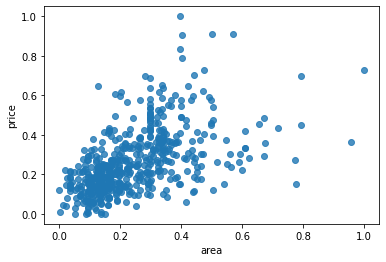

In [20]:
# visualize area-price relationship 

sns.regplot(x="area", y="price", data=df, fit_reg=False)

In [21]:
# split the data into train and test 

df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=10)

print(len(df_train))
print(len(df_test))

381
164


In [22]:
# Split into X and y for both train and test sets 
# reshaping is required since sklearn requires data to be in shape (n, 1), not a series of shape (n, )

X_train = df_train['area']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['price']

X_test = df_test['area']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['price']

print(X_train.shape)
print(y_train.shape)

(381, 1)
(381,)
